### Instructions

1) Please submit the .ipynb and .pdf file to gradescope

2) Please include your Name and UNI below.

### Name: Raksha Chandrashekar
### UNI: rc3729

##Setup

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# Part 1: Neural Network from the scratch
For this part, you are not allowed to use any library other than numpy.

In this part, you will implement the forward pass and backward pass (i.e. the derivates of each
parameter wrt to the loss) with the network image uploaded.

*   The weight matrix for the hidden layer is W1 and has bias b1.
*   The weight matrix for the output layer is W2 and has bias b2.
*   Activation function is sigmoid for both hidden and output layer
*   Loss function is the Mean Squared Error (MSE) loss

Refer to the below dictionary for dimensions for each matrix


In [8]:
np.random.seed(0) # don't change this
weights = {
'W1': np.random.randn(3, 2),
'b1': np.zeros(3),
'W2': np.random.randn(3),
'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [9]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [10]:
#Implement the forward pass - Z2 and Y
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    # Your code here
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [11]:
# Implement the backward pass - dLdZ1, dLdW1, dLdb1
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))

    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    ones = np.ones((1000))
    dLdb2 = np.dot(ones.T, dLdZ2)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)

    # Your code here

    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1)*(1-sigmoid(Z1))))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.sum(dLdZ1, axis=0)

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }

    return gradients, L

In [12]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [13]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': np.float64(0.029249230265318685)}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066]).

You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

# Part 2: Neural network to classify images: CIFAR-10

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

The train/test split is 50k/10k.

In [14]:
from tensorflow.keras.datasets import cifar10 #Code to load data, do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### 2.1 Plot 50 samples from each class/label from train set on a 10*5 subplot

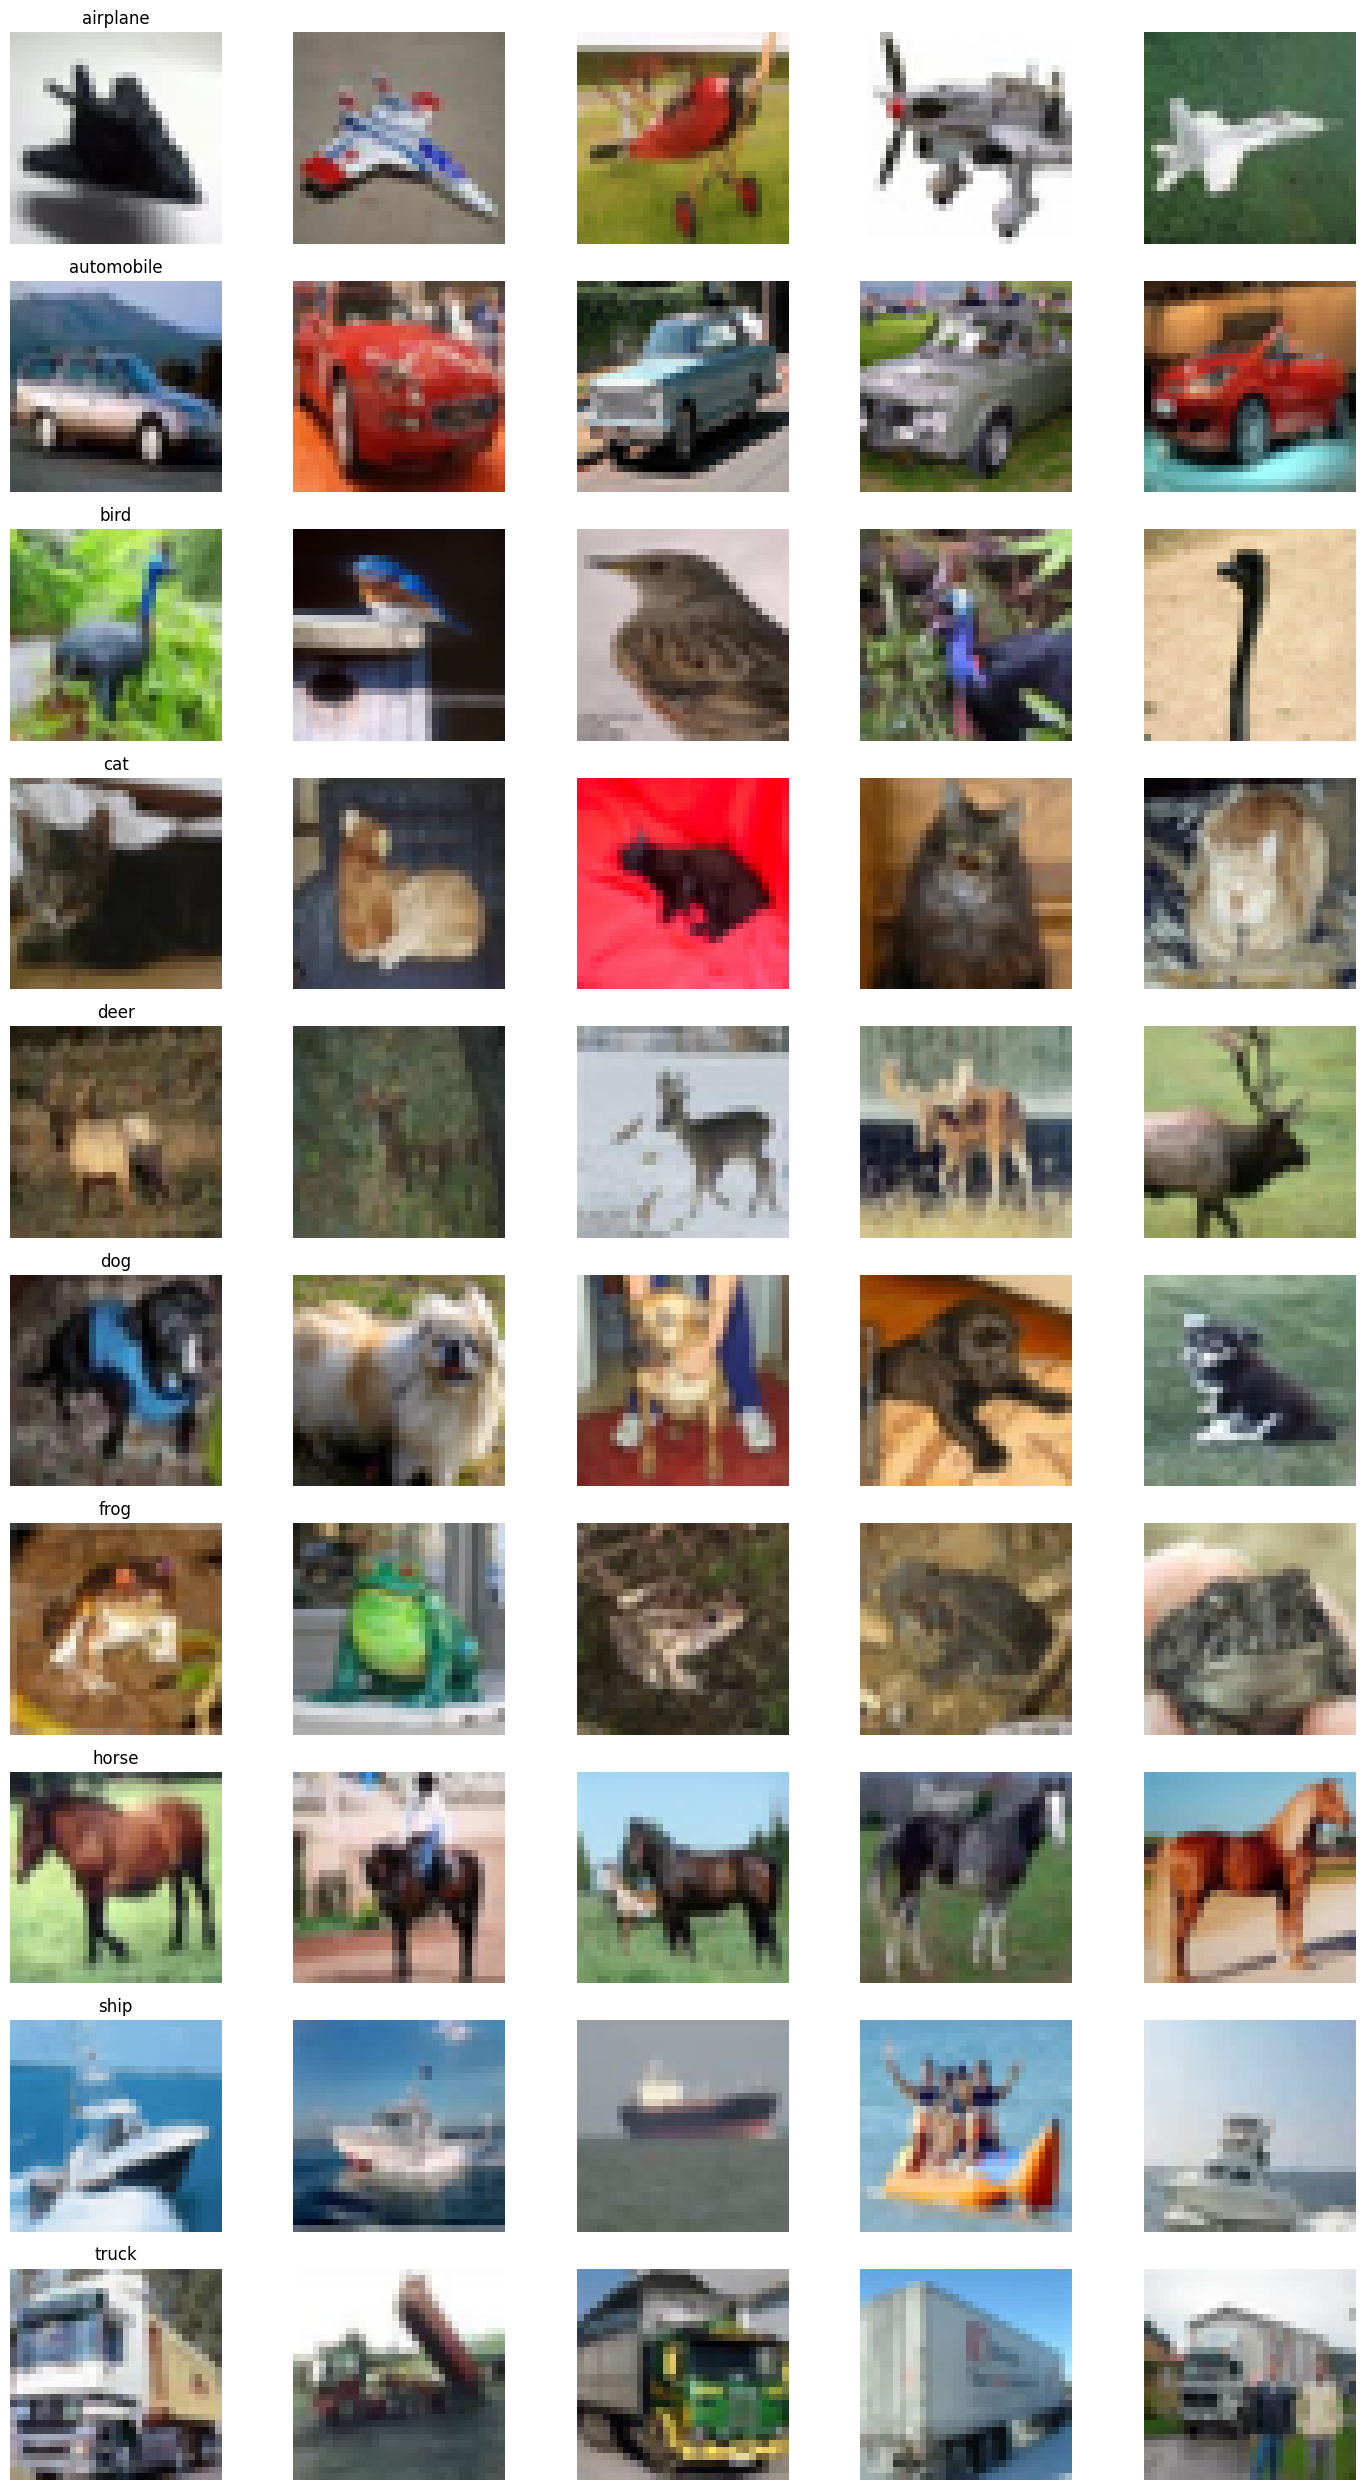

In [15]:
#Your code here
samples_per_class = {label: [] for label in range(10)}
for image, label in zip(x_dev, y_dev):
  label_int = label[0]
  if len(samples_per_class[label_int])<50:
    samples_per_class[label_int].append(image)
  if all(len(samples)==50 for samples in samples_per_class.values()):
    break

figure, axis = plt.subplots(10, 5, figsize=(15, 25))
figure.subplots_adjust(hspace=0.5)
for row in range(10):
  for col in range(5):
    image_index = col
    axis[row, col].imshow(samples_per_class[row][image_index], interpolation='nearest')
    axis[row, col].axis('off')
    if col==0:
      axis[row, col].set_title(LABELS[row])
plt.tight_layout()
plt.show()

###2.2 Preparing the dataset for NN

1) Print the shapes -  𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

3) Standardize the development and test sets.

4) One hot encode your labels

5) Train-test split your development set into train and validation sets (80:20 ratio).

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [17]:
#Your code here
print(f"Shape of Training Data: {x_dev.shape}")
print(f"Shape of Training Labels: {y_dev.shape}")
print(f"Shape of Test Data: {x_test.shape}")
print(f"Shape of Test Labels: {y_test.shape}")

Shape of Training Data: (50000, 32, 32, 3)
Shape of Training Labels: (50000, 1)
Shape of Test Data: (10000, 32, 32, 3)
Shape of Test Labels: (10000, 1)


In [18]:
#Your code here
x_dev = x_dev.reshape(x_dev.shape[0], -1)
y_dev = y_dev.flatten()
x_test = x_test.reshape(x_test.shape[0], -1)
y_test = y_test.flatten()

print(f"Shape of Training Data: {x_dev.shape}")
print(f"Shape of Training Labels: {y_dev.shape}")
print(f"Shape of Test Data: {x_test.shape}")
print(f"Shape of Test Labels: {y_test.shape}")

Shape of Training Data: (50000, 3072)
Shape of Training Labels: (50000,)
Shape of Test Data: (10000, 3072)
Shape of Test Labels: (10000,)


In [19]:
#Your code here
scaler = StandardScaler()
x_dev = scaler.fit_transform(x_dev)
x_test = scaler.transform(x_test)

In [20]:
#Your code here
y_dev = to_categorical(y_dev)
y_test = to_categorical(y_test)

In [21]:
#Your code here
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.2, random_state=42, stratify=y_dev)

print(f"Shape of Training Data: {x_train.shape}")
print(f"Shape of Training Labels: {y_train.shape}")
print(f"Shape of Validation Data: {x_val.shape}")
print(f"Shape of Validation Labels: {y_val.shape}")

Shape of Training Data: (40000, 3072)
Shape of Training Labels: (40000, 10)
Shape of Validation Data: (10000, 3072)
Shape of Validation Labels: (10000, 10)


### 2.3 Build the feed forward network with the below specifications

First layer size = 128

hidden layer size = 64

last layer size = Figure this out from the data!

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#Your code here
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #since there are 10 classes

###2.4 Print out the model summary. Mention the number of parameters for each layer.

In [23]:
#Your code here
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

The number of parameters in:
*   Flatten: 0 since it is just reshaping the vectors
*   1st Dense Layer: 128*3072 = 393,344
*   2nd Dense Layer: 64*128 = 8,256
*   3rd Dense Layer: (10*64)+10=650, the 10 that is added is the bias.

Therefore, the total number of parameters is 402,250.







###2.5 Do you think the number of parameters is dependent on the image height and width?

In [24]:
#Your comments here
'''Yes, the number of parameters is dependent on the image height and width because they are the input to the first dense layer (input size).
The first fully connected dense layer takes each pixel of the image and treat it as individual feature. Therefore, for CIFAR10, since each image is 32x32 and has 3 channels (RGB), the input to the dense layer is 32*32*3=3072.
'''

'Yes, the number of parameters is dependent on the image height and width because they are the input to the first dense layer (input size).\nThe first fully connected dense layer takes each pixel of the image and treat it as individual feature. Therefore, for CIFAR10, since each image is 32x32 and has 3 channels (RGB), the input to the dense layer is 32*32*3=3072.\n'

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output should equal to 1.**

In [25]:
#modify name of X_train based on your requirement


model.compile()
# output = model.predict(x_train[0].reshape(1,-1))
output = model.predict(x_train[0].reshape(32, 32, 3).reshape(1, 32, 32, 3))

print("Output: {:.2f}".format(sum(output[0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Output: 1.00


###2.6 Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs.

In [26]:
#Your code here
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
x_train = x_train.reshape(-1, 32, 32, 3)
x_val = x_val.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3241 - loss: 1.9828 - val_accuracy: 0.4141 - val_loss: 1.6641
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4444 - loss: 1.5743 - val_accuracy: 0.4413 - val_loss: 1.5859
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4803 - loss: 1.4629 - val_accuracy: 0.4708 - val_loss: 1.5089
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5082 - loss: 1.3814 - val_accuracy: 0.4787 - val_loss: 1.4851
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5332 - loss: 1.3314 - val_accuracy: 0.4876 - val_loss: 1.4610
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5468 - loss: 1.2796 - val_accuracy: 0.4897 - val_loss: 1.4956
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5653 - loss: 1.2221 - val_accuracy: 0.4931 - val_loss: 1.4700
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5829 - loss: 1.18

###2.7 Plot the training curves as described below

#### 2.7.1 Display the train vs validation loss over each epoch


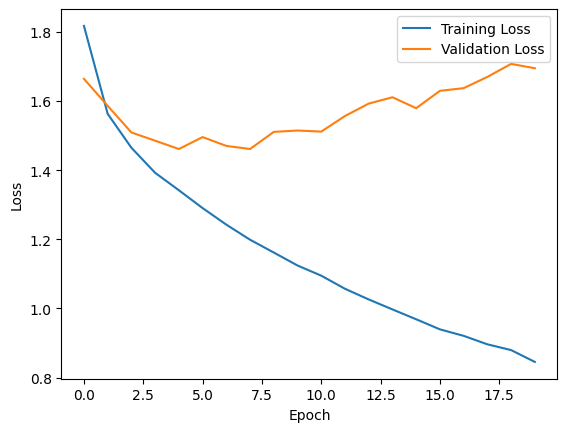

In [27]:
#Your code here
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 2.7.2 Display the train vs validation accuracy over each epoch

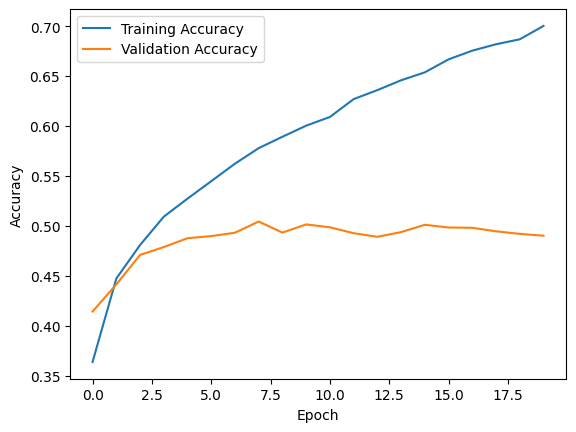

In [28]:
#Your code here
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 2.8 Finally, report the metric chosen on test set

In [29]:
#Your code here
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4953 - loss: 1.6806
Test Loss: 1.6976
Test Accuracy: 0.4937


The metric chose was accuracy. On the test set the accuracy is 0.4969 whihc is quite low.

### 2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


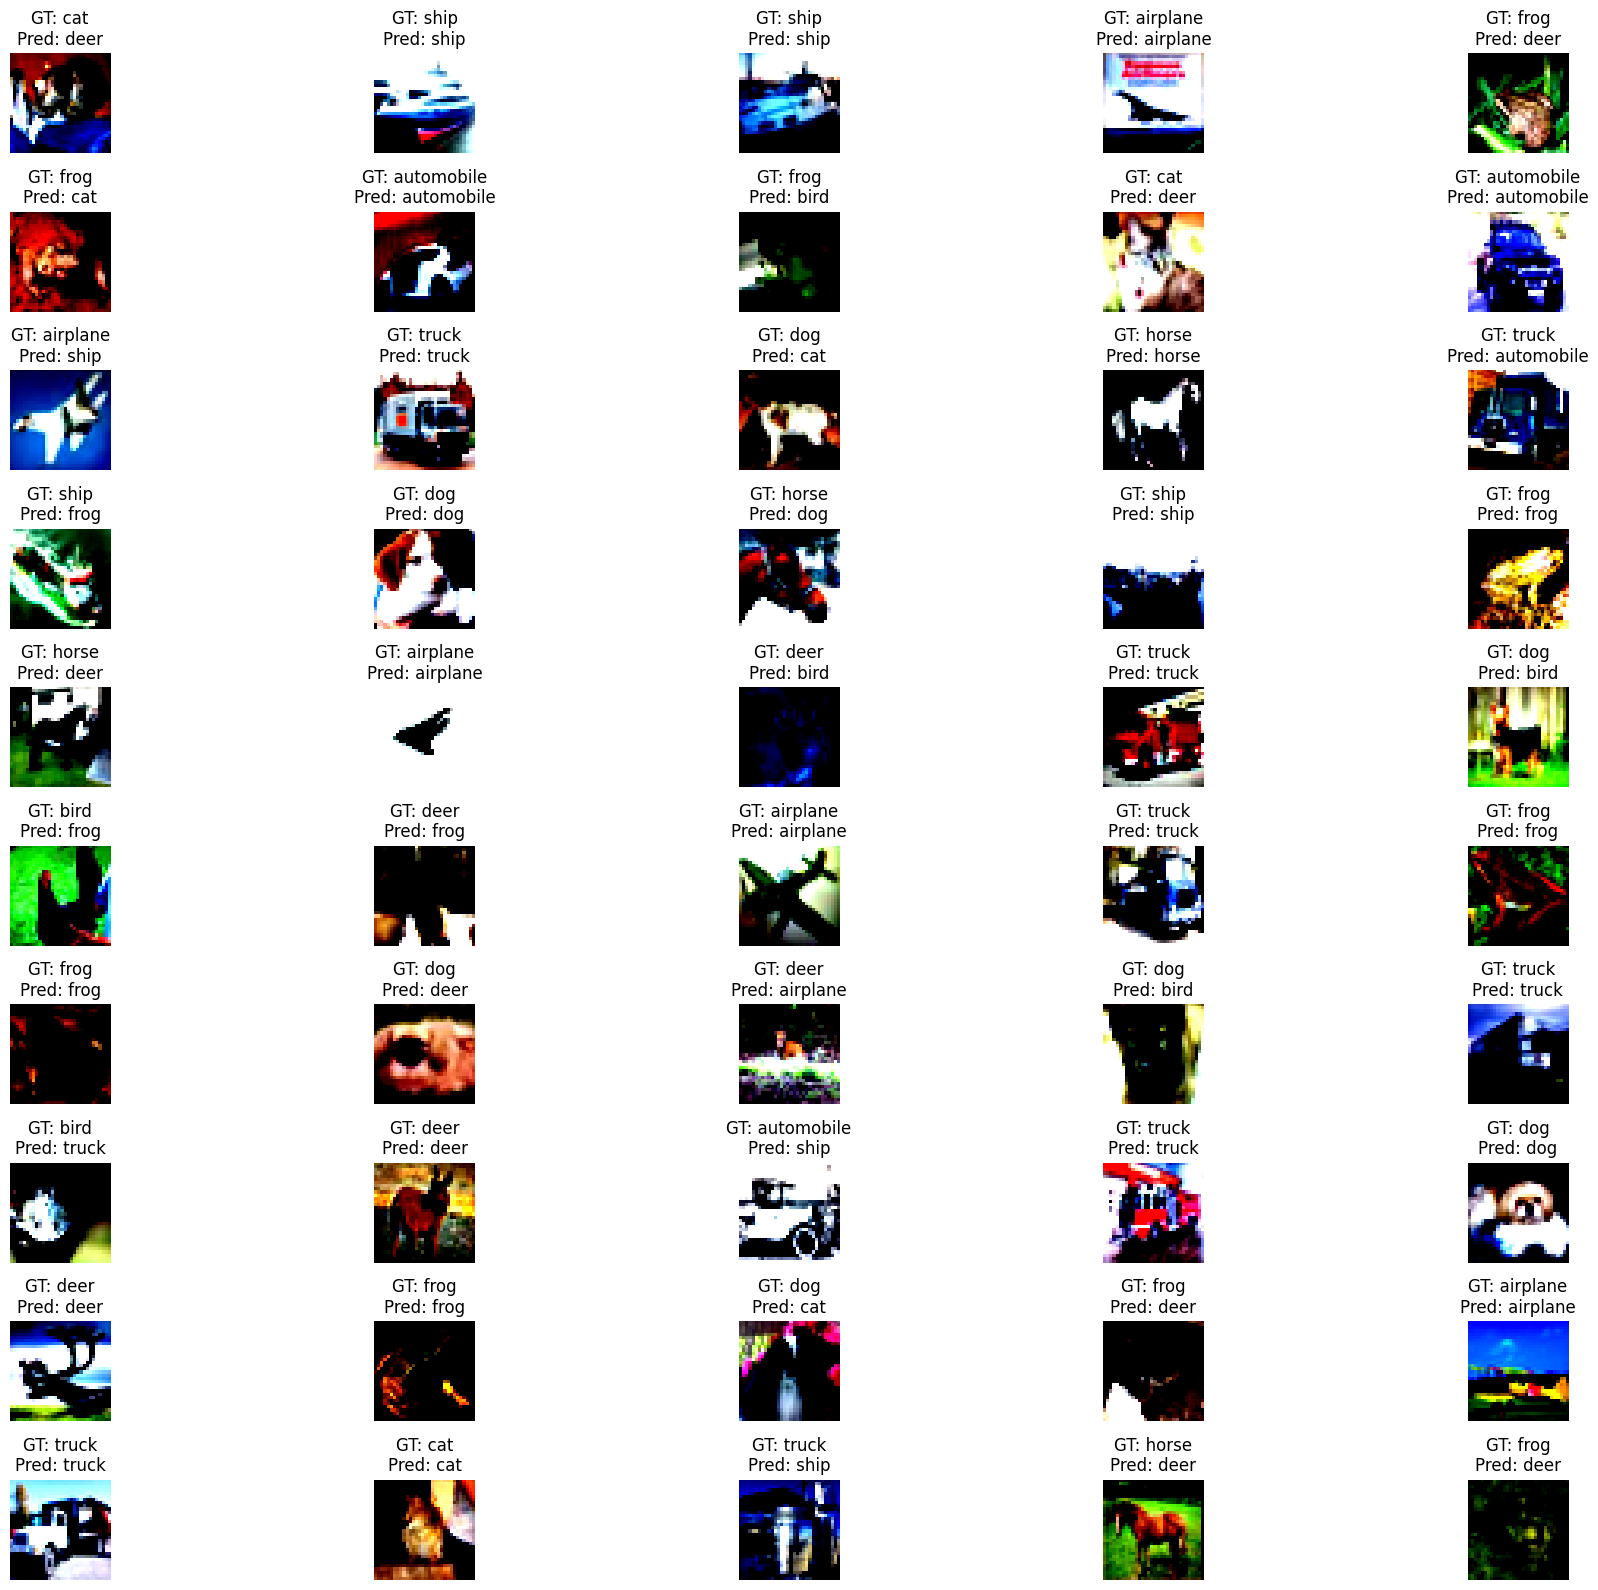

In [30]:
#Your code here
y_pred_prob = model.predict(x_test[:50])
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_test_classes = np.argmax(y_test[:50], axis=1)

plt.figure(figsize=(20,16))
for i in range(50):
  plt.subplot(10, 5, i+1)
  plt.imshow(x_test[i])
  plt.axis('off')
  ground_truth = LABELS[y_test_classes[i]]
  predicted_class = LABELS[y_pred_classes[i]]
  plt.title(f"GT: {ground_truth}\nPred: {predicted_class}")
plt.tight_layout()
plt.show()

# Part 3 - Convolutional Neural Networks

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [32]:
#Code to load the dataset - Do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


### 3.1 We will be implementing one of the first CNN models put forward by Yann LeCunn, which is commonly referred to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 and padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) Flatten the convolution output to feed it into fully connected layers

6) A fully connected layer with 120 units, ReLU activation

7) A fully connected layer with 84 units, ReLU activation

8) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [35]:
#Your code here
y_train_categorical = to_categorical(y_train, num_classes=10)
y_val_categorical = to_categorical(y_val, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

model = Sequential([
    Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(5, 5), padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=120, activation='relu'),
    Dense(units=84, activation='relu'),
    Dense(units=10, activation='softmax')
])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
# Check unique labels in y_val and corresponding shape
print(np.unique(y_val))                # Should be 0–9
print(y_val_categorical.shape)         # Should be (len(y_val), 10)
print(np.argmax(y_val_categorical[:10], axis=1))  # Should match y_val[:10]


[0 1 2 3 4 5 6 7 8 9]
(10000, 10)
[7 8 0 6 1 6 8 0 6 5]


### 3.2 Report the model summary

In [37]:
#Your code here
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

### 3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [ ]:
#Your code here
history = model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_val, y_val_categorical))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.2040 - loss: 2.1457 - val_accuracy: 0.3688 - val_loss: 1.7580
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.3879 - loss: 1.7057 - val_accuracy: 0.4222 - val_loss: 1.5937
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.4340 - loss: 1.5703 - val_accuracy: 0.4490 - val_loss: 1.5119
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.4611 - loss: 1.4891 - val_accuracy: 0.4707 - val_loss: 1.4635
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.4837 - loss: 1.4359 - val_accuracy: 0.4829 - val_loss: 1.4409
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.4912 - loss: 1.4152 - val_accuracy: 0.4942 - val_loss: 1.4111
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.5054 - loss: 1.3769 - val_accuracy: 0.5019 - val_loss: 1.3769
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.5158 -

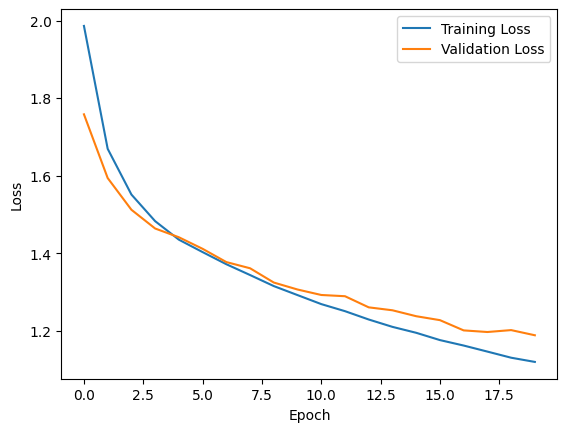

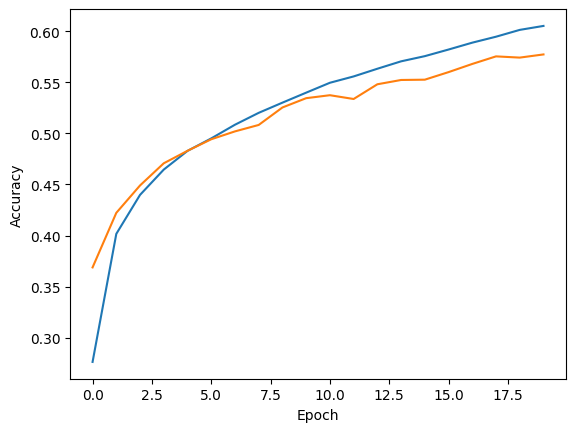

In [ ]:
#Your code here
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend
plt.show()

In [ ]:
#Your code here
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5895 - loss: 1.1916
Test Loss: 1.1974
Test Accuracy: 0.5800


To optimize, learning rate is set to 0.0001.

### 3.4 Overfitting
1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

#### 3.4.1 Dropout

In [ ]:
#Your code here
model_with_dropout = Sequential([
    Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(5, 5), padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=120, activation='relu'),
    Dropout(0.3),  # Add Dropout
    Dense(units=84, activation='relu'),
    Dropout(0.3),  # Add Dropout
    Dense(units=10, activation='softmax')
])

# Compile the model
model_with_dropout.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with Dropout
history_dropout = model_with_dropout.fit(X_train, y_train_categorical, epochs=20, batch_size=32,
                                          validation_data=(X_val, y_val_categorical))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 44ms/step - accuracy: 0.1455 - loss: 2.2428 - val_accuracy: 0.3251 - val_loss: 1.8364
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 34ms/step - accuracy: 0.3125 - loss: 1.8679 - val_accuracy: 0.3959 - val_loss: 1.6712
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.3628 - loss: 1.7349 - val_accuracy: 0.4379 - val_loss: 1.5590
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.3987 - loss: 1.6381 - val_accuracy: 0.4637 - val_loss: 1.4883
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.4247 - loss: 1.5744 - val_accuracy: 0.4795 - val_loss: 1.4426
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.4449 - loss: 1.5327 - val_accuracy: 0.4923 - val_loss: 1.4009
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.4624 - loss: 1.4940 - val_accuracy: 0.5000 - val_loss: 1.3706
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.4779 -

In [ ]:
#Your code here
test_loss_dropout, test_accuracy_dropout = model_with_dropout.evaluate(x_test, y_test_categorical)
print(f"Test Loss (with Dropout): {test_loss_dropout}")
print(f"Test Accuracy (with Dropout): {test_accuracy_dropout}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5767 - loss: 1.1877
Test Loss (with Dropout): 1.1934590339660645
Test Accuracy (with Dropout): 0.5759999752044678


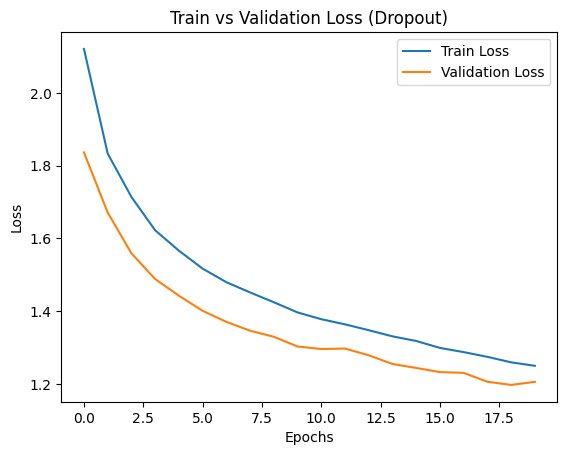

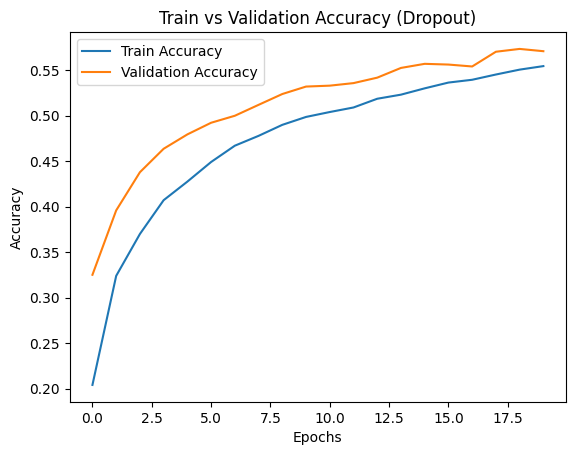

In [ ]:
#Your code here
plt.plot(history_dropout.history['loss'], label='Train Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss (Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_dropout.history['accuracy'], label='Train Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy (Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 3.4.2 Batch Normalization

In [ ]:
#Your code here
model_with_bn = Sequential([
    Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)),BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(5, 5), padding='valid', activation='relu'),BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=120, activation='relu'),
    BatchNormalization(),  # Add Batch Normalization
    Dense(units=84, activation='relu'),
    BatchNormalization(),  # Add Batch Normalization
    Dense(units=10, activation='softmax')
])

# Compile the model
model_with_bn.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with Batch Normalization
history_bn = model_with_bn.fit(X_train, y_train_categorical, epochs=20, batch_size=32,
                               validation_data=(X_val, y_val_categorical))

Epoch 1/20
 658/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.2088 - loss: 2.3882

In [39]:
#Your code here
test_loss_bn, test_accuracy_bn = model_with_bn.evaluate(x_test, y_test_categorical)
print(f"Test Loss (with Batch Normalization): {test_loss_bn}")
print(f"Test Accuracy (with Batch Normalization): {test_accuracy_bn}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5921 - loss: 1.1624
Test Loss (with Batch Normalization): 1.17965567111969
Test Accuracy (with Batch Normalization): 0.5903000235557556


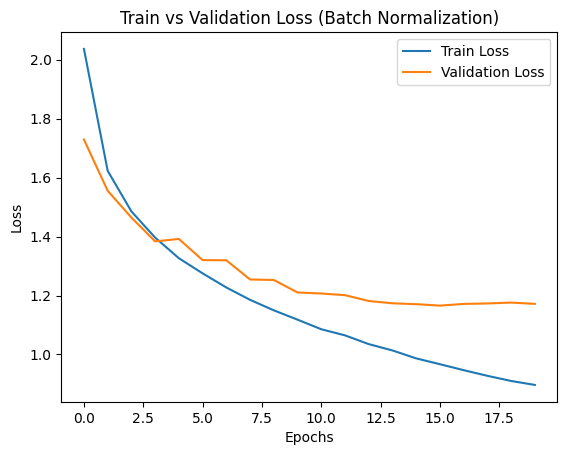

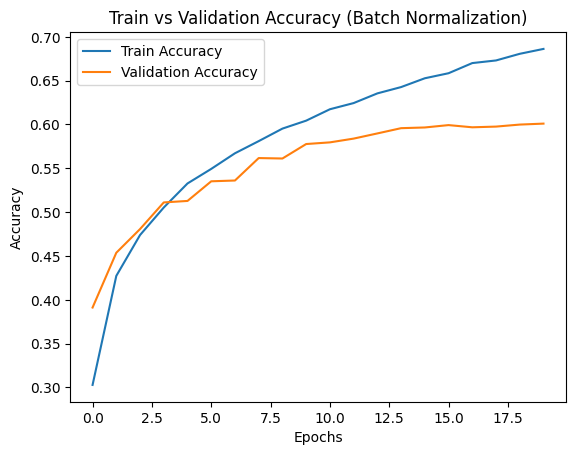

In [40]:
#Your code here
plt.plot(history_bn.history['loss'], label='Train Loss')
plt.plot(history_bn.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss (Batch Normalization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_bn.history['accuracy'], label='Train Accuracy')
plt.plot(history_bn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy (Batch Normalization)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Your comments here
'''
Default Model: Test Accuracy: 0.5800 , Test Loss: 1.1974
Dropout Model: Test Accuracy: 0.5759 , Test Loss: 1.1934
Batch Normalization: Test Accuracy: 0.6053 , Test Loss: 1.1319

The Batch Normalization has the lowest loss and highest accuracy compared to the other two models. This indicates that it generalizes well and reduces overfitting.
Dropout model has the 2nd lowest loss but default model has better accuracy.

Batch Normalization is the best model out of the three as it reduces overfitting and generalizes well. Dropout model provides some regularization.
'''